## Transcriptions `Analyzer`

[![ko-fi](https://ko-fi.com/img/githubbutton_sm.svg)](https://ko-fi.com/V7V4R566T)

In [16]:
# %pip install matplotlib
# %pip install sqlite3
#%pip install plotly
#%pip install pandas
#%pip install nbformat


In [17]:
import sqlite3
import matplotlib.pyplot as plt

In [21]:

# Connect to the database
conn = sqlite3.connect('transcriptions.db')
cursor = conn.cursor()
# Query the database 
cursor.execute('SELECT issue_category FROM transcriptions')
results = cursor.fetchall()
# Process the data
category_counts = {}
for result in results:
    category = result[0]
    category_counts[category] = category_counts.get(category, 0) + 1
# Draw the pie chart
labels = category_counts.keys()
sizes = category_counts.values()

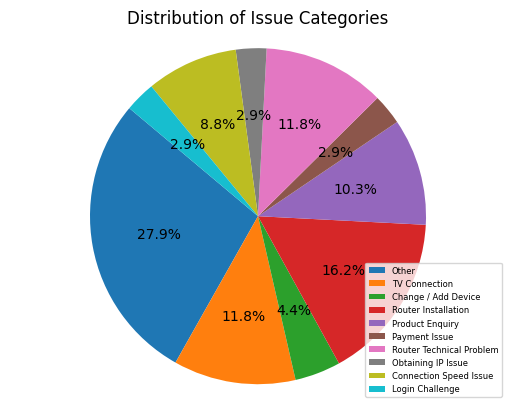

In [36]:
#explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2,0.0, 0, 0, 0.1]
plt.pie(sizes, autopct='%1.1f%%', startangle=140)#, explode=explode_list
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#Add Legend
plt.legend(labels=labels, loc='lower right', fontsize=6)
plt.title('Distribution of Issue Categories')
plt.show()

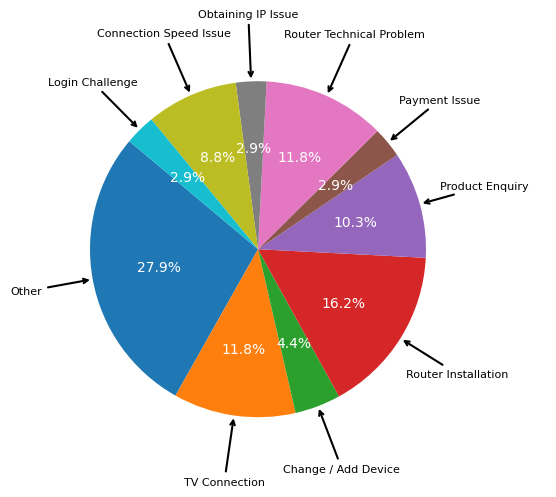

In [23]:
import numpy as np
labels = list(category_counts.keys())
sizes = list(category_counts.values())

# Create a pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, textprops=dict(color="w"))

# Add arrows to labels
for label, wedge in zip(labels, wedges):
    theta = (wedge.theta1 + wedge.theta2) / 2.0
    rad = 5  # You can adjust this distance
    x = rad * 0.8 * wedge.center[0] + rad * 0.2 * np.cos(np.radians(theta))
    y = rad * 0.8 * wedge.center[1] + rad * 0.2 * np.sin(np.radians(theta))
    plt.annotate(label, (x, y), xytext=(x * 1.4, y * 1.4),
                 arrowprops=dict(arrowstyle='->', lw=1.5),
                 fontsize=8, ha='center', va='center')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.title('Distribution of Issue Categories with Arrows to Labels')
plt.show()

### We can also use <span style="color:turquoise;">PLOTLY</span> to visualize the data


In [24]:
# Create a pie chart using Plotly
import plotly.express as px
import pandas

labels = list(category_counts.keys())
values = list(category_counts.values())
fig = px.pie(labels=labels, values=values, title='Distribution of Issue Categories')
#fig.update_layout(renderer="notebook")
fig.write_html('plotly_chart.html')
fig.show()


ModuleNotFoundError: No module named 'plotly'

In [ ]:
# Close the database connection
conn.close()

### Visualize issues reported per day.

In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('transcriptions.db')
query = "SELECT DATE(date), issue_category, COUNT(*) AS count FROM transcriptions WHERE issue_category IS NOT NULL GROUP BY DATE(date), issue_category"
df = pd.read_sql_query(query, conn)


df_pivot = df.pivot(index='DATE(date)', columns='issue_category', values='count').fillna(0)
#print (df_pivot)



#### Matplotlib

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() 

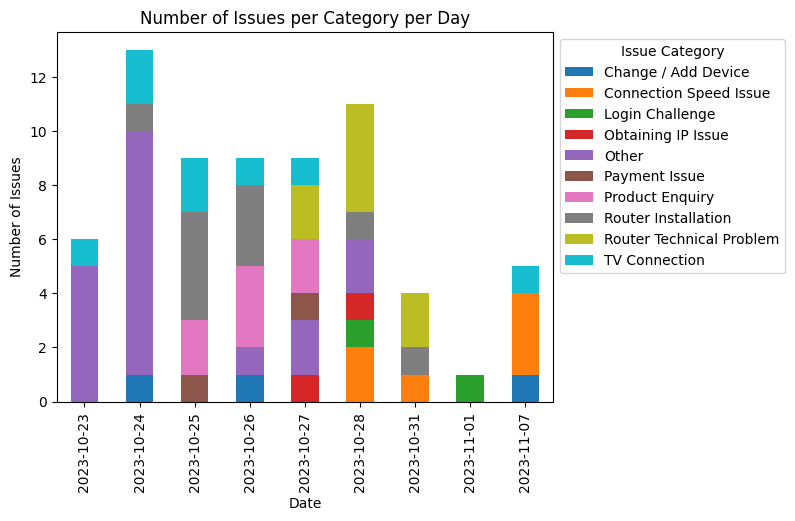

In [ ]:
import matplotlib.pyplot as plt

df_pivot.plot(kind='bar', stacked=True)
plt.xlabel('Date')
plt.ylabel('Number of Issues')
plt.title('Number of Issues per Category per Day')
plt.legend(title='Issue Category', bbox_to_anchor=(1, 1))
plt.show()


#### Plotly

In [ ]:
import plotly.express as px

fig = px.bar(df, x='DATE(date)', y='count', color='issue_category', title='Number of Issues per Category per Day')
fig.show()

#### Seaborn

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() 

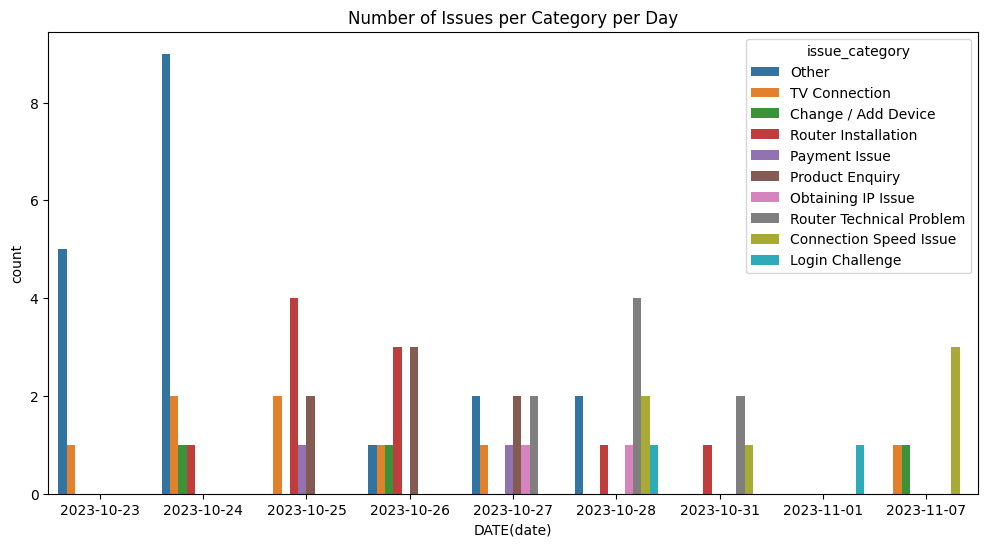

In [ ]:
#%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_pivot is already created
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='DATE(date)', y='count', hue='issue_category')
plt.title('Number of Issues per Category per Day')
plt.show()


In [ ]:
# %pip install altair
# %pip install bokeh
# %pip install pygal


#### Bokeh

In [ ]:
# from datetime import datetime
# from bokeh.plotting import figure, show
# from bokeh.models import ColumnDataSource

# # Convert 'date' to datetime if it's not already
# df['date'] = pd.to_datetime(df['DATE(date)'])

# source = ColumnDataSource(df)

# plot = figure(x_axis_label='Date', y_axis_label='Count', title='Number of Issues per Category per Day')

# plot.vbar(x='date', top='count', width=0.9, color='issue_category', source=source)

# # Rotate x-axis labels for better visibility
# plot.xaxis.major_label_orientation = "vertical"

# show(plot)



In [ ]:
import altair as alt
import pandas as pd

# Your data retrieval code
conn = sqlite3.connect('transcriptions.db')
query = "SELECT DATE(date) as date, issue_category, COUNT(*) AS count FROM transcriptions WHERE issue_category IS NOT NULL GROUP BY DATE(date), issue_category"
df = pd.read_sql_query(query, conn)

# Altair chart
chart = alt.Chart(df).mark_bar().encode(
    x='DATE(date):O',
    y='count:Q',
    color='issue_category:N',
).properties(
    title='Number of Issues per Category per Day'
).interactive()

# Save Altair chart as HTML
alt.renderers.set_embed_options(html=True)
chart.save('altair_chart.html')


#### Altair

In [ ]:
import altair as alt

alt.Chart(df).mark_bar().encode(
    x='DATE(date):O',
    y='count:Q',
    color='issue_category:N',
).properties(
    title='Number of Issues per Category per Day'
).interactive()


alt.Chart(...)

#### Pygal

In [ ]:
# import pygal

# line_chart = pygal.Bar(x_label_rotation=45, show_legend=False)
# line_chart.title = 'Number of Issues per Category per Day'
# line_chart.x_labels = df['DATE(date)']
# for category in df['issue_category'].unique():
#     line_chart.add(category, df[df['issue_category'] == category]['count'].tolist())

# line_chart.render_to_file('issues_chart.svg')


### `Scatter Plots`

#### Matplotlib and Seaborn

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() 

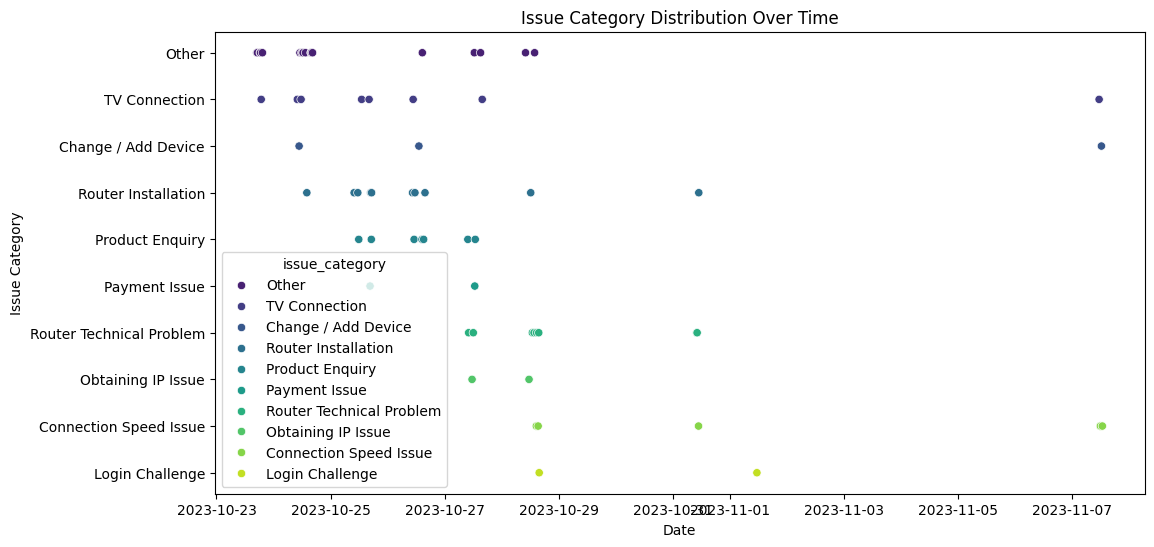

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to SQLite database
conn = sqlite3.connect('transcriptions.db')

# Fetch data from the database
query = "SELECT date, issue_category FROM transcriptions WHERE issue_category IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='date', y='issue_category', data=df, hue='issue_category', palette='viridis')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Issue Category')
plt.title('Issue Category Distribution Over Time')

# Show the plot
plt.show()


#### Plotly

In [ ]:
import sqlite3
import pandas as pd
import plotly.express as px

# Connect to SQLite database
conn = sqlite3.connect('transcriptions.db')

# Fetch data from the database
query = "SELECT date, issue_category FROM transcriptions WHERE issue_category IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Create a scatter plot using Plotly
fig = px.scatter(df, x='date', y='issue_category', color='issue_category',
                 title='Issue Category Distribution Over Time',
                 labels={'date': 'Date', 'issue_category': 'Issue Category'})

# Show the plot
fig.show()


/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:

#install seaborn and wordcloud
%pip install seaborn wordcloud 

#import seaborn
import seaborn as sns

#import wordcloud
import wordcloud
#import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud imported!')

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/22/8c/18556cbe48b6d2e03d6bb1001ef79b9255c767d2927addcf090b700a1de9/wordcloud-1.9.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for pandas>=1.2 from https://files.pythonhosted.org/packages/f1/c5/1e9c317a5e6af9280ad86a523ab6efe2ca70a0eb4bfb2220d8d08e255ae1/pandas-2.1.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 80.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━

--2023-11-10 09:38:15--  https://png2.cleanpng.com/dy/e7b6913b28d83ac82711b27ff6335c09/L0KzQYm3VMA5N5ZBiZH0aYP2gLBuTgRma5lzgdVqbD32hcH3jCJ1NZR6iAZ4bXX1PcTskwZqa5Yye9H2cIX3dcO0ifNwdqQye9N1bD3mdbB7hgIuPZJoeadsZkO4QYbrUcUvOGk8S6o7NEO0RYO6UsEyPWE8S6U8Mz7zfri=/kisspng-technical-support-customer-service-computer-icons-call-center-5aca5cf3515d15.0873824315232115073333.png
Resolving png2.cleanpng.com (png2.cleanpng.com)... 

104.21.235.208, 104.21.235.207, 2606:4700:3038::6815:ebcf, ...
Connecting to png2.cleanpng.com (png2.cleanpng.com)|104.21.235.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55449 (54K) [application/octet-stream]
Saving to: ‘wifi.png’

wifi.png            100%[===================>]  54.15K  --.-KB/s    in 0.01s   

2023-11-10 09:38:18 (3.82 MB/s) - ‘wifi.png’ saved [55449/55449]



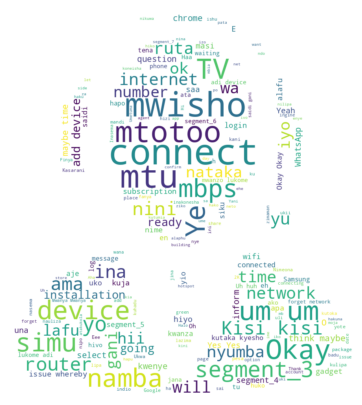

In [ ]:
#%pip install wordcloud matplotlib Pillow numpy
import sqlite3
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Connect to the SQLite database
conn = sqlite3.connect('transcriptions.db')
cursor = conn.cursor()

# Fetch all transcriptions from the transcriptions table
cursor.execute('SELECT transcription FROM transcriptions')
transcriptions = cursor.fetchall()

# Close the database connection
conn.close()

# Combine all transcriptions into a single string
text = ' '.join(transcription[0] for transcription in transcriptions)

# Define custom stop words
custom_stopwords = set(['kwa', 'hivyo', 'segment', 'wav', 'na', 'ya', 'kwa', 'ya', 'kwa', 'ndani', 'juu', 'chini', 'mbele', 'nyuma', 'karibu', 'mbali',
    'pamoja', 'pekee', 'kila', 'mara', 'sana', 'hata', 'lakini', 'kwani', 'kwa nini', 'ni', 'si',
    'vyake', 'yake', 'vyetu', 'yao', 'yake', 'wetu', 'wao', 'wako', 'zake', 'zao', 'wangu', 'wako',
    'zangu', 'zako', 'zetu', 'zao', 'yangu', 'yako', 'yetu', 'yao', 'mimi', 'wewe', 'yeye', 'sisi',
    'ninyi', 'wao', 'wao', 'huyo', 'huyu', 'kile', 'kile', 'hicho', 'hiki', 'wale', 'hao', 'walio',
    'wanao', 'kwa nini', 'kwa sababu', 'hivyo', 'hivi', 'basi', 'lakini', 'ila', 'au', 'na', 'pia',
    'hapana', 'ndiyo', 'kwamba', 'ili', 'kama', 'jinsi', 'wakati', 'mara', 'sasa', 'hivyo', 'hapa',
    'pale', 'huku', 'kule', 'huo', 'huyo', 'ile', 'ile', 'yule', 'yule', 'vile', 'vile', 'yakini',
    'labda', 'je', 'ndiyo', 'sivyo', 'bila', 'kwa hiyo', 'kwa hivyo', 'hivyo', 'namna', 'basi',
    'bado', 'kiasi', 'wakati mwingine', 'lakini', 'hata', 'hivyo', 'hapa', 'kule', 'pale', 'mbali',
    'sasa', 'mara', 'nyakati', 'kila mara', 'muda', 'mpya', 'kila wakati', 'mara nyingine',
    'mara nyingine', 'wakati mwingine', 'kwa wakati', 'katika kipindi hicho', 'katika siku hizi',
    'katika miaka hiyo', 'huko nyuma', 'baada ya muda', 'mpaka sasa', 'hivi karibuni', 'siku hizi',
    'siku za usoni', 'siku za usoni', 'baada ya muda', 'bila kuchelewa', 'wakati wote', 'haraka',
    'polepole', 'vizuri', 'vibaya', 'sawa', 'kabisa', 'pamoja', 'pia', 'hasa', 'kwa ujumla', 'kwa kawaida',
    'kwa upande mwingine', 'kwa bahati mbaya', 'kwa hakika', 'kwa kweli', 'kwa vyovyote vile', 'kweli',
    'hakika', 'bila shaka', 'ni dhahiri', 'bila shaka', 'labda', 'labda', 'labda', 'inawezekana',
    'wazi', 'waziwazi', 'sawa', 'vizuri', 'sawa', 'sahihi', 'kweli', 'hakika', 'bila shaka',
    'kwa vyovyote vile', 'bila shaka', 'labda', 'kwa hakika', 'wazi', 'kwa vyovyote vile',
    'hakika', 'bila shaka', 'labda', 'labda', 'labda', 'kwa kweli', 'bila shaka', 'ni dhahiri',
    'kwa vyovyote vile', 'bila shaka', 'labda', 'inawezekana', 'wazi', 'waziwazi', 'sawa', 'vizuri',
    'sawa', 'sahihi', 'kweli', 'hakika', 'bila shaka', 'kwa vyovyote vile', 'bila shaka', 'labda',
    'kwa hakika', 'wazi', 'kwa vyovyote vile', 'hakika', 'bila shaka', 'labda', 'labda', 'labda',
    'kwa kweli', 'bila shaka', 'ni dhahiri', 'kwa vyovyote vile', 'bila shaka', 'labda', 'inawezekana',
    'wazi', 'waziwazi', 'sawa', 'vizuri', 'sawa', 'sahihi', 'kweli', 'hakika', 'bila shaka',
    'kwa vyovyote vile', 'bila shaka', 'labda', 'kwa hakika', 'wazi', 'kwa vyovyote vile', 'hakika',
    'bila shaka', 'labda', 'labda', 'labda', 'kwa kweli', 'bila shaka', 'ni dhahiri', 'kwa vyovyote vile',
    'bila shaka', 'labda', 'inawezekana', 'wazi', 'waziwazi', 'mbili', 'segment_1','segment_2', 'language','file','da','kuna','hello','sw'])

# Add custom stop words to the default set of stop words
stopwords = set(STOPWORDS)
stopwords.update(custom_stopwords)

# Load the Wi-Fi PNG as a mask
# Use wget to download the Wi-Fi PNG
#!wget -O wifi.png "https://similarpng.com/download/?id=41164&token=bcff3f632fd16ff099a49c2f0932b47a"
!wget -O wifi.png "https://png2.cleanpng.com/dy/e7b6913b28d83ac82711b27ff6335c09/L0KzQYm3VMA5N5ZBiZH0aYP2gLBuTgRma5lzgdVqbD32hcH3jCJ1NZR6iAZ4bXX1PcTskwZqa5Yye9H2cIX3dcO0ifNwdqQye9N1bD3mdbB7hgIuPZJoeadsZkO4QYbrUcUvOGk8S6o7NEO0RYO6UsEyPWE8S6U8Mz7zfri=/kisspng-technical-support-customer-service-computer-icons-call-center-5aca5cf3515d15.0873824315232115073333.png"

mask = np.array(Image.open("wifi.png")) 

# Generate a word cloud with custom stop words
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, mask=mask).generate(text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



### SUBPLOTS

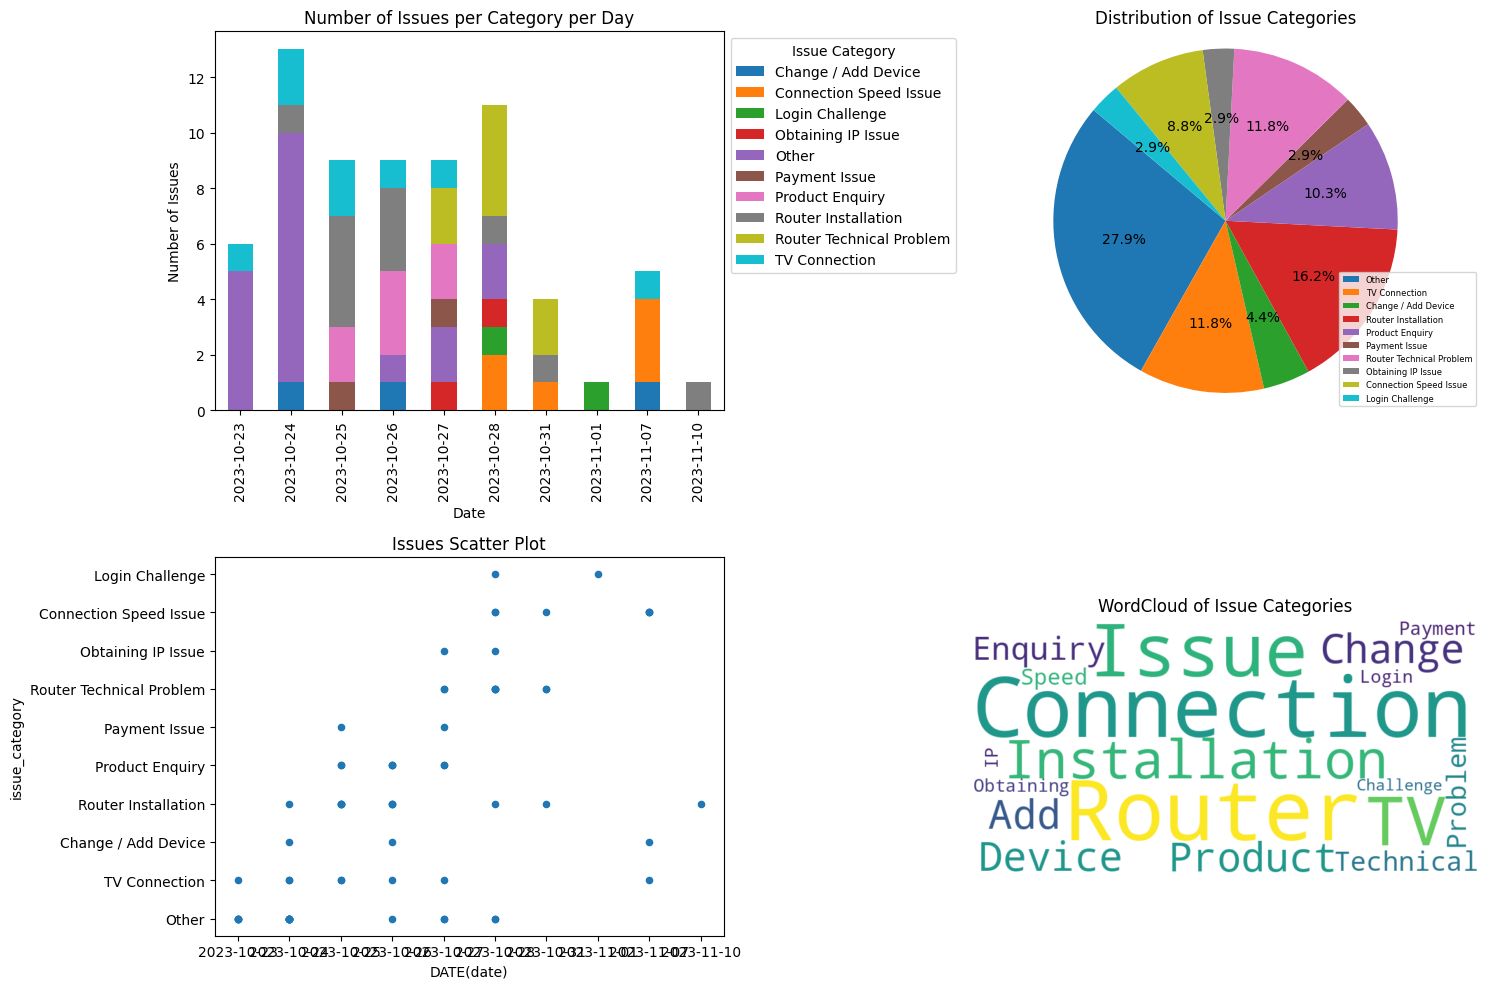

In [52]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from wordcloud import WordCloud

conn = sqlite3.connect('transcriptions.db')
cursor = conn.cursor()

cursor.execute('SELECT issue_category FROM transcriptions')
results = cursor.fetchall()

category_counts = {}
for result in results:
    category = result[0]
    category_counts[category] = category_counts.get(category, 0) + 1


query = "SELECT DATE(date), issue_category, COUNT(*) AS count FROM transcriptions WHERE issue_category IS NOT NULL GROUP BY DATE(date), issue_category"
df = pd.read_sql_query(query, conn)

df_pivot = df.pivot(index='DATE(date)', columns='issue_category', values='count').fillna(0)




fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

ax0, ax1, ax2, ax3 = axs.flatten()

df_pivot.plot(kind='bar', stacked=True, ax=ax0)
ax0.set_xlabel('Date')
ax0.set_ylabel('Number of Issues')
ax0.set_title('Number of Issues per Category per Day')
ax0.legend(title='Issue Category', bbox_to_anchor=(1, 1))


ax1.pie(category_counts.values(), autopct='%1.1f%%', startangle=140)
ax1.axis('equal')
ax1.legend(labels=category_counts.keys(), loc='lower right', fontsize=6)
ax1.set_title('Distribution of Issue Categories')

# Adding subplot 3: Scatter Plot
query = "SELECT DATE(date), issue_category FROM transcriptions WHERE issue_category IS NOT NULL"
df_scatter = pd.read_sql_query(query, conn)
df_scatter.plot(kind='scatter', x='DATE(date)', y='issue_category', ax=ax2)
ax2.set_title('Issues Scatter Plot')

# Adding subplot 4: WordCloud w
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(' '.join(df['issue_category']))
ax3.imshow(wordcloud, interpolation='bilinear')
ax3.axis('off')
ax3.set_title('WordCloud of Issue Categories')

conn.close()
plt.tight_layout()
plt.show()
